In [1]:
import plotly.graph_objects as go
import pickle
import pandas as pd

## Plotly plot for Category Food and Demographic Groups

In [6]:
df_demo = pd.read_csv("data/df_demo.csv")
list_group = ["hh_comp_desc","income_desc", "age_desc"]
dic_group = {}

for group in list_group:
    dic_group[group]= df_demo.groupby([group]).mean()

In [7]:
relevant_columns = df_demo.columns[5:df_demo.shape[1]-1]
dic_button = {}
for group in list_group:
    button_list = []
    for col in relevant_columns:
        button_list.append(dict(label=col,
                         method="update",
                         args=[{"x": [dic_group[group][col].index], "y": [dic_group[group][col].values]}]))
    dic_button[group] = button_list

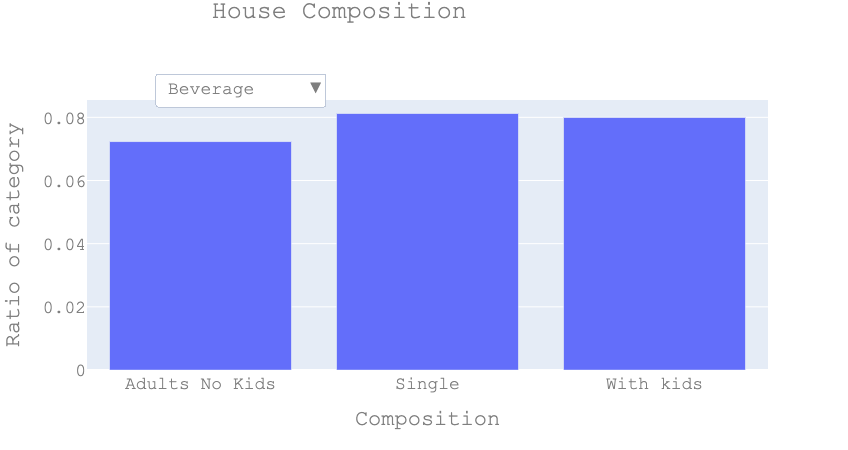

In [8]:
# Composition plot
group = "hh_comp_desc"
fig1 = go.Figure()
fig1.add_trace(
    go.Bar(x=dic_group[group]["Beverage"].index,
               y=dic_group[group]["Beverage"].values,
               name="High"))
fig1.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            active=0,
            buttons=dic_button["hh_comp_desc"],
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        )
    ])
fig1.update_layout(
    title={
        'text': "House Composition",
        'y':1,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Composition",
    yaxis_title="Ratio of category",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

In [ ]:
import plotly.io as pio
pio.write_html(fig1, 'data/test.html')

## Plotly campaign amount view

In [10]:
# Plot amount of coupons distributed and redeemed
df_campaign = pd.read_pickle("data/df_campaign_desc.pickle")

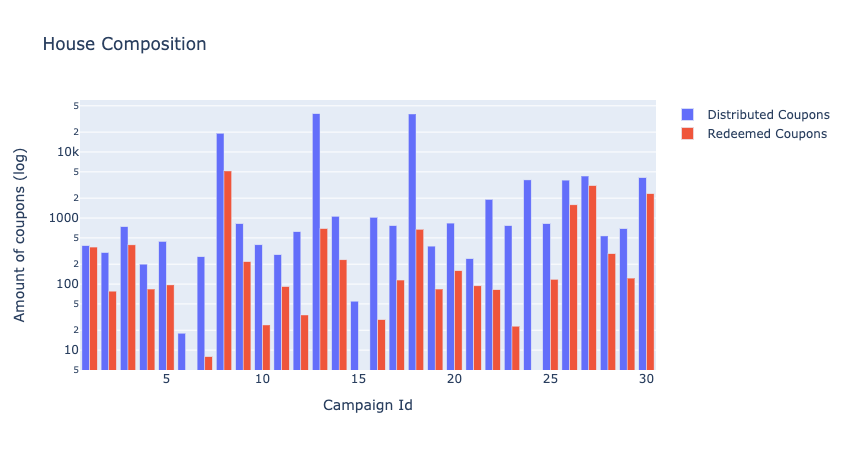

In [21]:
fig2 = go.Figure()
fig2.add_trace(
    go.Bar(x=df_campaign.index,
               y=df_campaign.distributed,
               name="Distributed Coupons"))
fig2.add_trace(
    go.Bar(x=df_campaign.index,
               y=df_campaign.redeemed,
               name="Redeemed Coupons"))
fig2.update_layout(yaxis_type="log")
fig2.update_layout(
    title={'text': "Amount of coupons per campaign",},
    xaxis_title="Campaign",
    yaxis_title="Amount of coupons (log)")

In [32]:
df_camp_type= df_campaign.groupby("description")

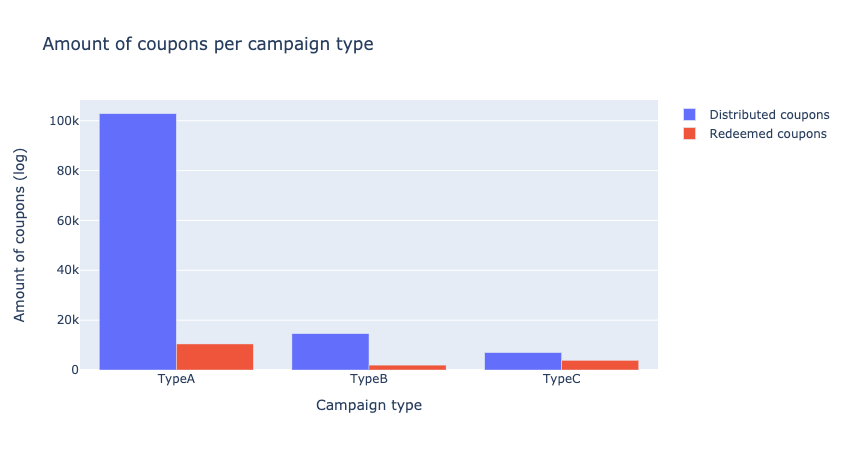

In [33]:
fig3 = go.Figure()
fig3.add_trace(
    go.Bar(x=df_camp_type["distributed"].sum().index,
               y=df_camp_type["distributed"].sum().values,
               name="Distributed coupons"))
fig3.add_trace(
    go.Bar(x=df_camp_type["redeemed"].sum().index,
               y=df_camp_type["redeemed"].sum().values,
               name="Redeemed coupons"))
fig3.update_layout(
    title={'text': "Amount of coupons per campaign type",},
    xaxis_title="Campaign type",
    yaxis_title="Amount of coupons")

In [34]:
df_campaign["ratio_redeemed"] = df_campaign.redeemed/df_campaign.distributed
df_camp_type= df_campaign.groupby("description")

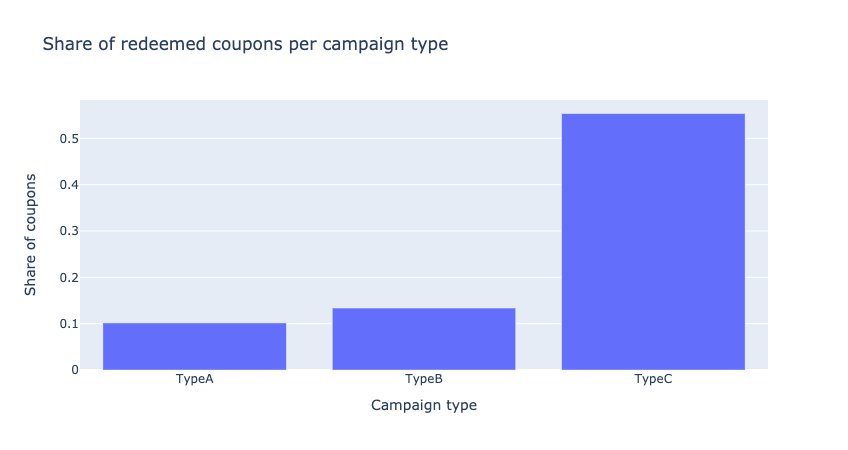

In [36]:
fig4 = go.Figure()
fig4.add_trace(
    go.Bar(x=df_camp_type["distributed"].mean().index,
               y=df_camp_type["redeemed"].sum().values/df_camp_type["distributed"].sum().values,
               name="Procentage share of redeemed coupons"))
fig4.update_layout(
    title={'text': "Share of redeemed coupons per campaign type",},
    xaxis_title="Campaign type",
    yaxis_title="Share of coupons")

## Plotly campaigns money view

In [49]:
df_money = pd.read_pickle("data/df_money_offered.pickle")

In [58]:
df_money["saved"] = df_money.redeemed.apply(lambda x : int(x))*df_money.coupon_disc
df_money_group = df_money.groupby("campaign")

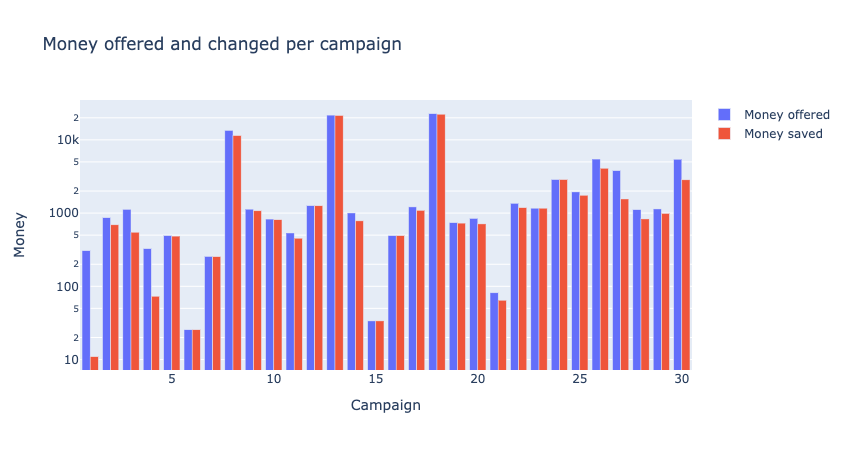

In [63]:
fig5 = go.Figure()
fig5.add_trace(
    go.Bar(x=df_money_group.coupon_disc.sum().index,
               y=df_money_group.coupon_disc.sum().values,
               name="Money offered"))
fig5.add_trace(
    go.Bar(x=df_money_group.saved.sum().index,
               y=df_money_group.saved.sum().values,
               name="Money saved"))
fig5.update_layout(yaxis_type="log")
fig5.update_layout(
    title={'text': "Money offered and changed per campaign",},
    xaxis_title="Campaign",
    yaxis_title="Money")